# Credit Risk Assessment Model for Predicting Loan Defaults using XGBoost

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
correlation_with_target = data.corr()['not.fully.paid'].sort_values(ascending=False)
print(correlation_with_target)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64


C:\Users\Prajakta\AppData\Local\Temp\ipykernel_18672\2165712158.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()['not.fully.paid'].sort_values(ascending=False)


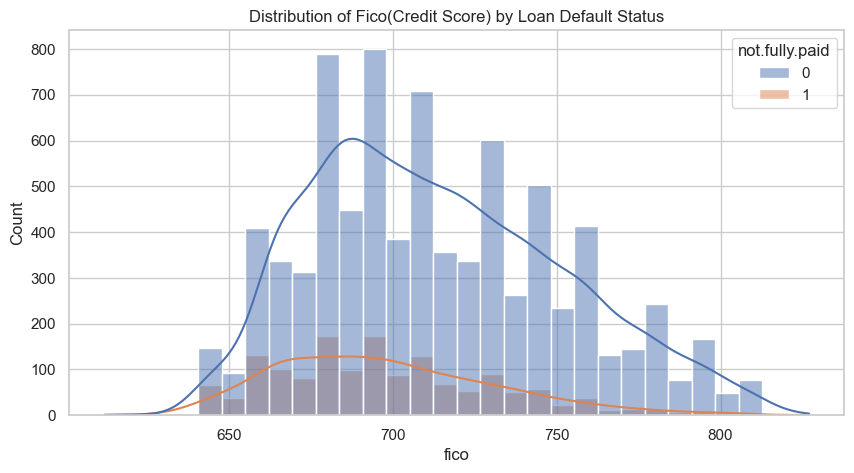

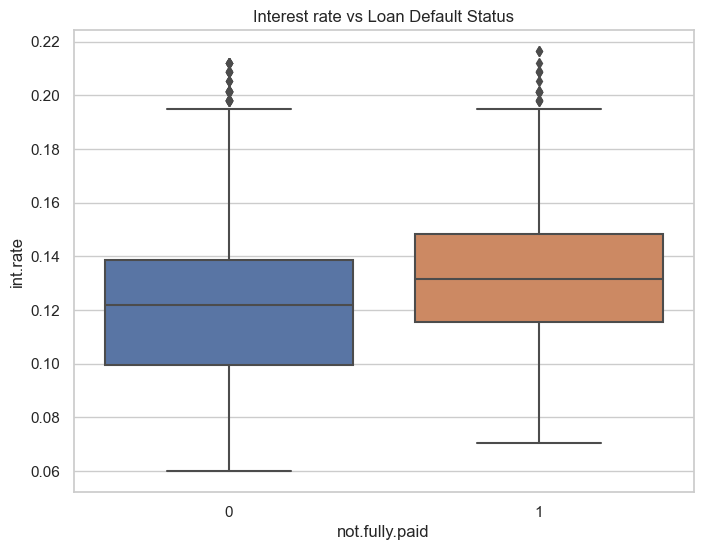

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='fico',hue='not.fully.paid',bins=30,kde=True)
plt.title("Distribution of Fico(Credit Score) by Loan Default Status")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='not.fully.paid',y='int.rate')
plt.title("Interest rate vs Loan Default Status")
plt.show()


C:\Users\Prajakta\AppData\Local\Temp\ipykernel_18672\3599235900.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


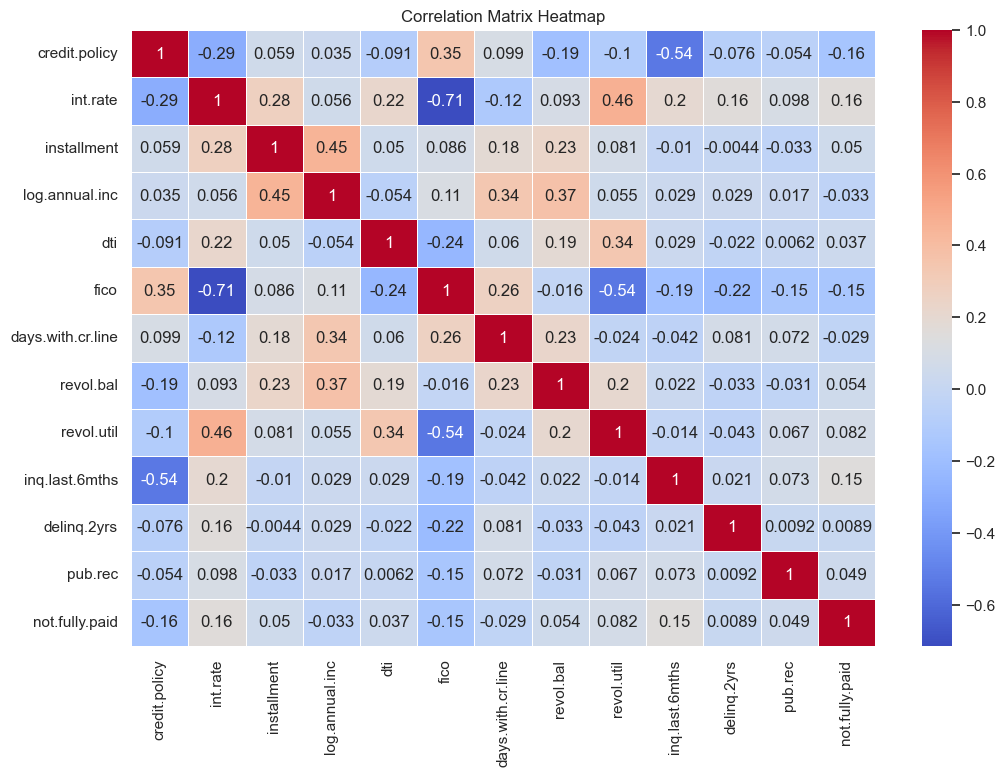

In [5]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [6]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [9]:
#Checking for duplicate values
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [credit.policy, purpose, int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec, not.fully.paid]
Index: []


In [10]:
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
   credit.policy             purpose  int.rate  installmen

In [11]:
from sklearn.model_selection import train_test_split

x=data.drop(['purpose','not.fully.paid'],axis=1)
y=data['not.fully.paid']

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
Y_train.head()

7317    0
350     0
5206    0
2673    1
3528    0
Name: not.fully.paid, dtype: int64

In [46]:
# Adjust the SMOTE sampling strategy (e.g., 0.5 means 50% of the majority class count)
smote = SMOTE(sampling_strategy=0.6, random_state=42)  # Adjust the ratio based on experimentation
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

# Set scale_pos_weight based on the class imbalance ratio
scale_pos_weight = np.sum(y_resampled == 0) / np.sum(y_resampled == 1)

In [47]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [scale_pos_weight]  # Use the imbalance ratio from earlier
}

# Initialize XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Setup Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Fit the best model on the full dataset
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_resampled, y_resampled)
y_pred = best_xgb.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


C:\Users\Prajakta\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 1.666839378238342, 'subsample': 0.6}
Best F1 Score: 0.6864824568398182
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1611
           1       0.25      0.18      0.21       305

    accuracy                           0.78      1916
   macro avg       0.55      0.54      0.54      1916
weighted avg       0.76      0.78      0.77      1916

